In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

In [43]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


# Goals:
# Explore Data

How does smoking affect insurance cost?

How does having children affect insurance cost?

How does the BMI affect insurance cost?

How does the sex affect insurance cost?

How does age affect insurance cost?

# Build Insurance Cost Predictor

What are the dominant factors?

# data exploration

# How does smoking affect insurance cost?

In [16]:
a = df[['smoker','expenses']]

In [17]:
print(a)

     smoker  expenses
0       yes  16884.92
1        no   1725.55
2        no   4449.46
3        no  21984.47
4        no   3866.86
...     ...       ...
1333     no  10600.55
1334     no   2205.98
1335     no   1629.83
1336     no   2007.95
1337    yes  29141.36

[1338 rows x 2 columns]


In [19]:
a1 = a.groupby(['smoker']).mean()
print(a1)

            expenses
smoker              
no       8434.268449
yes     32050.231971


In [22]:
a2 = round(a1['expenses'][1]/a1['expenses'][0])
print('The average smoker is charged about {x} times the amount of average non-smoker.'.format(x=a2))

The average smoker is charged about 4 times the amount of average non-smoker.


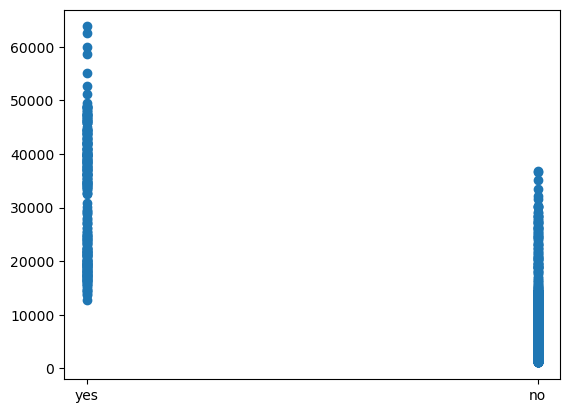

In [24]:
plt.scatter(df['smoker'],df['expenses'])
plt.show()

# How does having children affect insurance cost?

In [28]:
b = df[['children','expenses']]

              expenses
children              
0         12365.975767
1         12731.171821
2         15073.564000
3         15355.318535
4         13850.656800
5          8786.035556


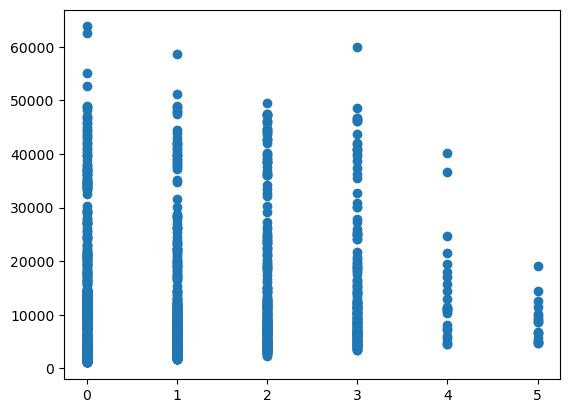

In [30]:
b1 = b.groupby(['children']).mean()
print(b1)
plt.scatter(df['children'],df['expenses'])
plt.show()

[574, 324, 240, 157, 25, 18]


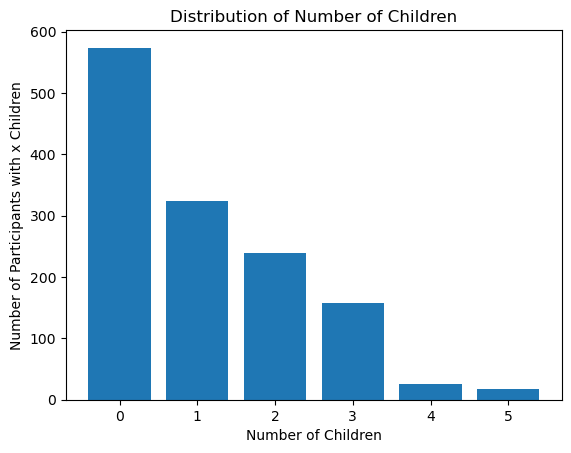

In [32]:
b2 = b['children']

no_child = []
one_child = []
two_children = []
three_children = []
four_children = []
five_children = []

for i in b2:
    if i == 0:
        no_child.append(i)
    if i == 1:
        one_child.append(i)
    if i == 2:
        two_children.append(i)
    if i == 3:
        three_children.append(i)
    if i == 4:
        four_children.append(i)
    if i == 5:
        five_children.append(i)



child_dist = [len(no_child)]+[len(one_child)]+[len(two_children)]+[len(three_children)]+[len(four_children)]+[len(five_children)]
print(child_dist)

x = [0, 1, 2, 3, 4, 5]
plt.bar(x, child_dist)
plt.title('Distribution of Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Number of Participants with x Children')
plt.show()

# How does the BMI affect insurance cost?

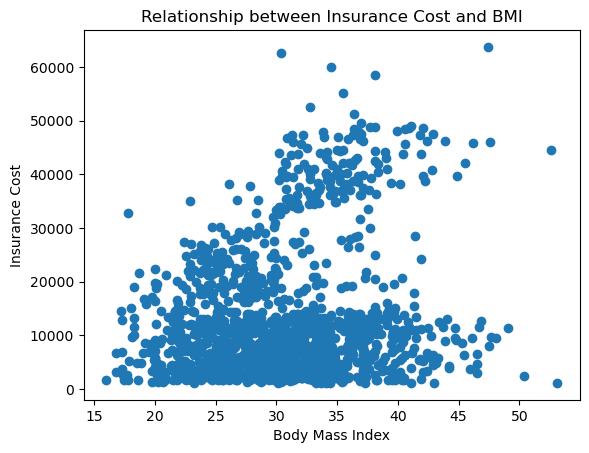

In [34]:
bmi = df['bmi']
cost = df['expenses']
smoker = df['smoker']

plt.scatter(bmi,cost)
plt.title('Relationship between Insurance Cost and BMI')
plt.xlabel('Body Mass Index')
plt.ylabel('Insurance Cost')
plt.show()

In [38]:
from scipy import stats

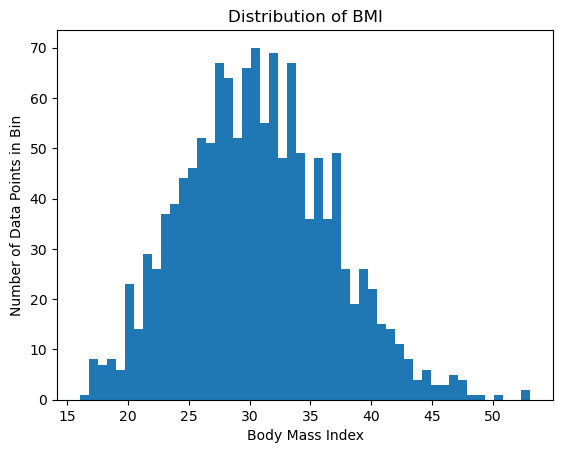

Normally distributed


In [54]:
plt.hist(bmi, bins=50)
plt.title('Distribution of BMI')
plt.xlabel('Body Mass Index')
plt.ylabel('Number of Data Points in Bin')
plt.show()

pvalue = stats.jarque_bera(bmi)[1]
if pvalue > 0.05:
    print('Not normally distributed')
else:
    print('Normally distributed')

# How does the sex affect insurance cost?

In [40]:
c = df[['sex','expenses']]

In [41]:
c1 = c.groupby(['sex']).mean()
print(c1)

            expenses
sex                 
female  12569.578897
male    13956.751420


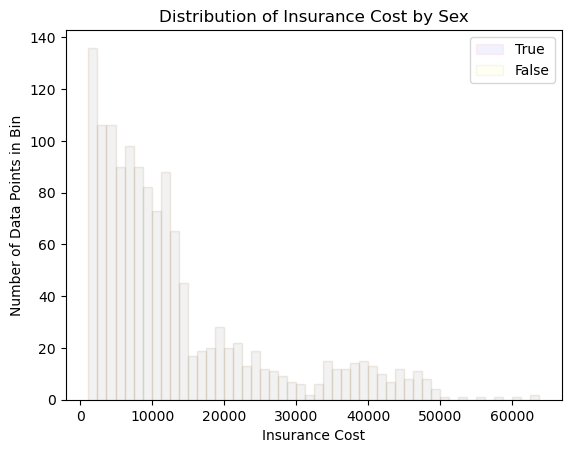

In [55]:
female = df['sex'] == 'female'
cx1 = df[female]

male = df['sex'] == 'male'
cx2 = df[female]

plt.hist(df['expenses'],bins=50,alpha=0.05,label=female, color="blue", ec="red")
plt.hist(df['expenses'],bins=50,alpha=0.05,label=male, color="yellow", ec="green")
plt.title('Distribution of Insurance Cost by Sex')
plt.xlabel('Insurance Cost')
plt.ylabel('Number of Data Points in Bin')
plt.legend(loc='upper right')
plt.show()

(array([136., 106., 106.,  90.,  98.,  90.,  82.,  73.,  88.,  65.,  45.,
         17.,  19.,  20.,  28.,  20.,  22.,  13.,  19.,  12.,  11.,   9.,
          7.,   6.,   2.,   6.,  15.,  12.,  12.,  14.,  15.,  13.,  10.,
          7.,  12.,   8.,  11.,   8.,   4.,   1.,   0.,   1.,   0.,   1.,
          0.,   1.,   0.,   1.,   0.,   2.]),
 array([ 1121.87  ,  2374.8412,  3627.8124,  4880.7836,  6133.7548,
         7386.726 ,  8639.6972,  9892.6684, 11145.6396, 12398.6108,
        13651.582 , 14904.5532, 16157.5244, 17410.4956, 18663.4668,
        19916.438 , 21169.4092, 22422.3804, 23675.3516, 24928.3228,
        26181.294 , 27434.2652, 28687.2364, 29940.2076, 31193.1788,
        32446.15  , 33699.1212, 34952.0924, 36205.0636, 37458.0348,
        38711.006 , 39963.9772, 41216.9484, 42469.9196, 43722.8908,
        44975.862 , 46228.8332, 47481.8044, 48734.7756, 49987.7468,
        51240.718 , 52493.6892, 53746.6604, 54999.6316, 56252.6028,
        57505.574 , 58758.5452, 60011.5164, 61

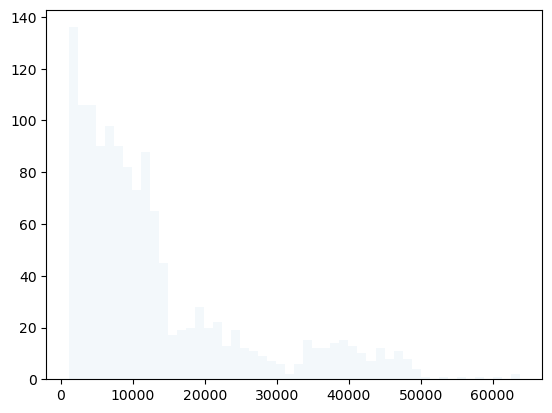

In [59]:
plt.hist(df['expenses'],bins=50,alpha=0.05,label=female)

(array([136., 106., 106.,  90.,  98.,  90.,  82.,  73.,  88.,  65.,  45.,
         17.,  19.,  20.,  28.,  20.,  22.,  13.,  19.,  12.,  11.,   9.,
          7.,   6.,   2.,   6.,  15.,  12.,  12.,  14.,  15.,  13.,  10.,
          7.,  12.,   8.,  11.,   8.,   4.,   1.,   0.,   1.,   0.,   1.,
          0.,   1.,   0.,   1.,   0.,   2.]),
 array([ 1121.87  ,  2374.8412,  3627.8124,  4880.7836,  6133.7548,
         7386.726 ,  8639.6972,  9892.6684, 11145.6396, 12398.6108,
        13651.582 , 14904.5532, 16157.5244, 17410.4956, 18663.4668,
        19916.438 , 21169.4092, 22422.3804, 23675.3516, 24928.3228,
        26181.294 , 27434.2652, 28687.2364, 29940.2076, 31193.1788,
        32446.15  , 33699.1212, 34952.0924, 36205.0636, 37458.0348,
        38711.006 , 39963.9772, 41216.9484, 42469.9196, 43722.8908,
        44975.862 , 46228.8332, 47481.8044, 48734.7756, 49987.7468,
        51240.718 , 52493.6892, 53746.6604, 54999.6316, 56252.6028,
        57505.574 , 58758.5452, 60011.5164, 61

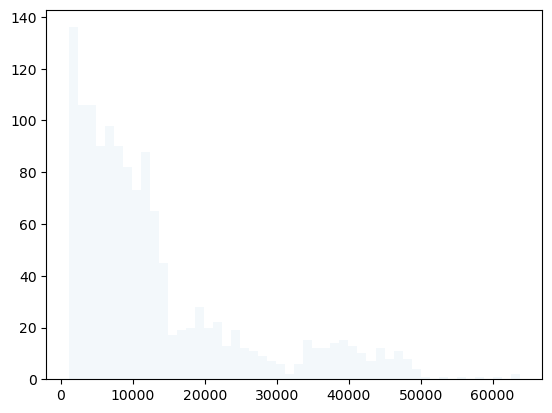

In [58]:
plt.hist(df['expenses'],bins=50,alpha=0.05,label=male)


# How does age affect insurance cost?

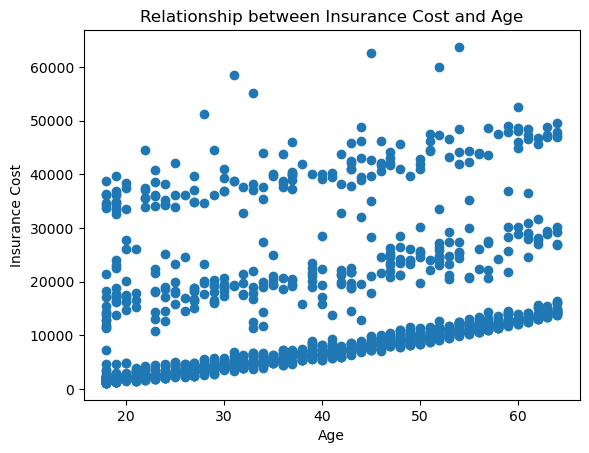

In [56]:
plt.scatter(x='age',y='expenses',data=df)
plt.title('Relationship between Insurance Cost and Age')
plt.xlabel('Age')
plt.ylabel('Insurance Cost')
plt.show()

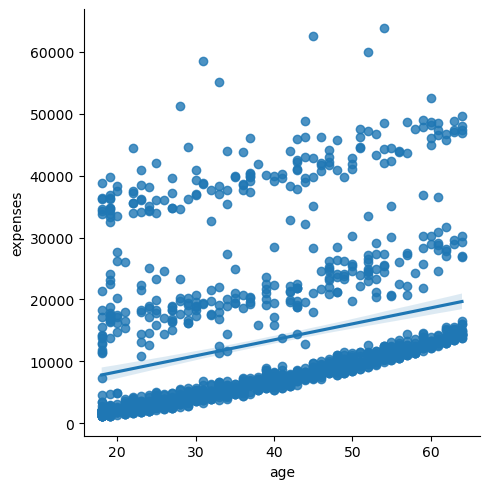

In [60]:
sns.lmplot(x='age',y='expenses',data=df)

# Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [72]:
reg= linear_model.LinearRegression()

In [73]:
X = df[['age','bmi','children']]
Y = df['expenses']

In [74]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2, random_state=1)

In [75]:
reg.fit(x_train,y_train)

LinearRegression()

In [76]:
reg.coef_

array([246.40180959, 301.21790424, 254.71755181])

In [77]:
reg.intercept_

-5898.800697199849

In [78]:
y_predictions = reg.predict(x_test)
score = reg.score(x_test, y_test)
print(score)

0.13258138175264522


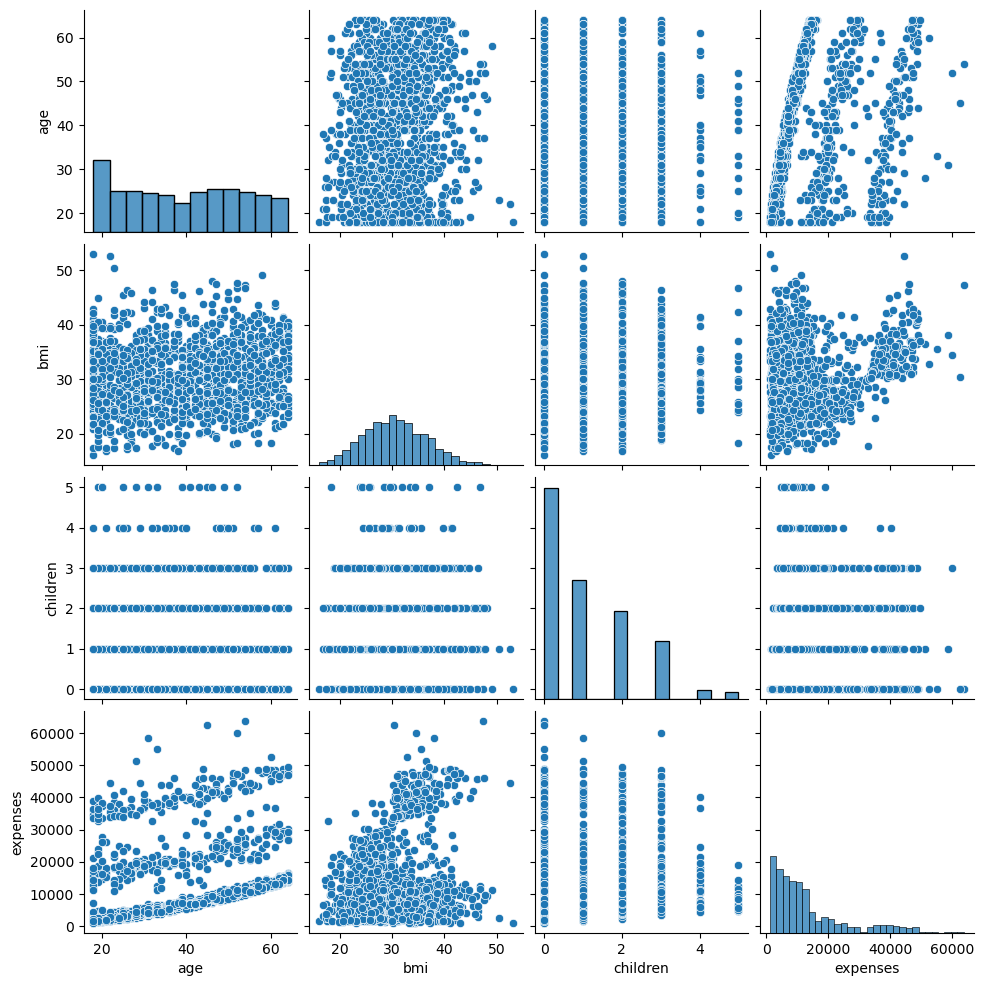

In [88]:
sns.pairplot(df)